# Loading libraries

In [188]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, classification_report
import warnings
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve
import re
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Loading data

In [192]:
# === Load preselected SNP data === #
data_snp = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/PRADI/SNP_coding_chr1_chr22_additive.csv")  # Replace with your full merged dataset if needed
print(data_snp.shape)
data_snp.head()


(511, 178)


,chr1:63043840:AG:A_A,chr2:109640281:G:A_A,chr2:111695715:C:T_T,chr2:111703717:G:A_A,chr2:132668213:TTAACTC:T_TTAACTC,chr2:235136333:C:T_T,chr2:236906720:CA:C_C,chr3:137132678:C:T_T,chr4:2731727:G:A_A,chr4:152665939:C:T_T,...,chr19:46651990:C:T_C,chr19:46655698:G:A_G,chr19:46658945:C:A_C,chr19:46663485:T:C_T,chr19:51360089:A:G_G,chr20:8766116:A:G_G,chr20:8823625:G:A_A,chr20:17888796:G:T_T,chr20:24136062:T:G_T,chr22:48531736:T:C_T
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0


In [193]:
df_filtered = data_snp.loc[:, ~data_snp.columns.str.startswith("chr19")]
data_snp = df_filtered.copy()

In [194]:
# === Load preselected SNP data === #
data_pheno = pd.read_csv("C:/Users/bciez/Documents/Basilio/Columbia_University/MLdosage/PRADI/pheno_oct2022_filtered_PC",sep="\t")  # Replace with your full merged dataset if needed
print(data_pheno.shape)
data_pheno.head()

(511, 10)


,FID,IID,SEX,APOE4,AGE,ADRD_FINAL,PC1,PC2,PC3,PC4
0,CWR_6021,CWR_6021_1,2,2.0,65,1,-0.0260,0.0660,0.0681,-0.0103
1,CWR_6053,CWR_6053_1,1,0.0,87,1,0.0226,0.0006,0.0115,0.0238
2,CWR_6060,CWR_6060_1,2,0.0,61,0,-0.0166,-0.0130,0.0561,0.0143
3,IHG_87236,IHG_87236_1,2,0.0,82,1,NaN,NaN,NaN,0.0035
4,IHG_87500,IHG_87500_1,2,0.0,77,1,-0.0208,-0.0030,0.0132,0.0288


In [195]:
data = pd.concat([data_pheno, data_snp], axis=1)
data

,FID,IID,SEX,APOE4,AGE,ADRD_FINAL,PC1,PC2,PC3,PC4,...,chr16:49726727:C:A_A,chr16:89799752:A:G_A,chr16:90013930:C:T_C,chr16:90014771:A:G_A,chr17:14995601:T:C_C,chr20:8766116:A:G_G,chr20:8823625:G:A_A,chr20:17888796:G:T_T,chr20:24136062:T:G_T,chr22:48531736:T:C_T
0,CWR_6021,CWR_6021_1,2,2.0,65,1,-0.0260,0.0660,0.0681,-0.0103,...,0,0,1,1,0,0,0,0,2,1
1,CWR_6053,CWR_6053_1,1,0.0,87,1,0.0226,0.0006,0.0115,0.0238,...,0,0,1,1,0,0,1,0,0,1
2,CWR_6060,CWR_6060_1,2,0.0,61,0,-0.0166,-0.0130,0.0561,0.0143,...,0,0,0,0,0,0,0,0,0,0
3,IHG_87236,IHG_87236_1,2,0.0,82,1,NaN,NaN,NaN,0.0035,...,1,1,2,2,1,0,0,0,1,0
4,IHG_87500,IHG_87500_1,2,0.0,77,1,-0.0208,-0.0030,0.0132,0.0288,...,0,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,IHG_88412,IHG_88412_1,2,0.0,74,1,-0.0162,-0.0016,0.0396,-0.0478,...,0,2,0,0,0,0,0,0,1,1
507,IHG_88413,IHG_88413_1,2,0.0,92,0,0.0819,-0.0385,0.0166,-0.0029,...,0,0,1,0,0,0,0,0,0,0
508,IHG_88415,IHG_88415_1,2,0.0,80,0,-0.0016,0.0117,-0.0053,-0.0063,...,0,1,0,0,0,0,0,0,0,0
509,IHG_88416,IHG_88416_1,2,0.0,83,0,-0.0254,0.0383,0.0326,-0.0056,...,0,0,2,2,0,0,0,0,1,0


In [196]:
# === Define features and target === #
data.rename(columns={'ADRD_FINAL': 'ADRD'}, inplace=True)
data.rename(columns={'APOEe4': 'APOE4'}, inplace=True)
X = data.drop(columns=["FID","IID","AGE","SEX","APOE4","ADRD","PC1","PC2","PC3","PC4"])  # Replace 'ADRD_FINAL' with your phenotype column
y = data["ADRD"]


In [197]:
X.head()

,chr1:63043840:AG:A_A,chr2:109640281:G:A_A,chr2:111695715:C:T_T,chr2:111703717:G:A_A,chr2:132668213:TTAACTC:T_TTAACTC,chr2:235136333:C:T_T,chr2:236906720:CA:C_C,chr3:137132678:C:T_T,chr4:2731727:G:A_A,chr4:152665939:C:T_T,...,chr16:49726727:C:A_A,chr16:89799752:A:G_A,chr16:90013930:C:T_C,chr16:90014771:A:G_A,chr17:14995601:T:C_C,chr20:8766116:A:G_G,chr20:8823625:G:A_A,chr20:17888796:G:T_T,chr20:24136062:T:G_T,chr22:48531736:T:C_T
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,1,0,0,0,0,2,1
1,0,0,0,0,2,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
2,1,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,0,0,0,...,1,1,2,2,1,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [198]:
y.head()

0    1
1    1
2    0
3    1
4    1
Name: ADRD, dtype: int64

In [199]:
print(y.value_counts())


ADRD
0    325
1    186
Name: count, dtype: int64


# Split data

In [200]:
# Check for NaNs or infinite values
print("NaNs in X:", X.isnull().sum().sum())
print("NaNs in y:", y.isnull().sum())
print("Infinite values in X:", np.isinf(X).sum().sum())

# Option 1: Drop rows with any NaNs in X or y
#data_clean = data.dropna()
#X = data_clean.drop(columns=["IID", "ADRD"])
#y = data_clean["ADRD"]
#data = data_clean.copy()


# Option 2 (alternative): Fill NaNs (optional)
# X = X.fillna(0)

# Check again
print("After cleaning - NaNs in X:", X.isnull().sum().sum())
print("After cleaning - NaNs in y:", y.isnull().sum())


NaNs in X: 0
NaNs in y: 0
Infinite values in X: 0
After cleaning - NaNs in X: 0
After cleaning - NaNs in y: 0


In [201]:
#data_clean = data.dropna()
#data = data_clean.copy()
# Sanitize column names
X.columns = [re.sub(r'[^\w]', '_', col) for col in X.columns]

In [202]:
# === Split data === #
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


In [203]:
X_train

,chr1_63043840_AG_A_A,chr2_109640281_G_A_A,chr2_111695715_C_T_T,chr2_111703717_G_A_A,chr2_132668213_TTAACTC_T_TTAACTC,chr2_235136333_C_T_T,chr2_236906720_CA_C_C,chr3_137132678_C_T_T,chr4_2731727_G_A_A,chr4_152665939_C_T_T,...,chr16_49726727_C_A_A,chr16_89799752_A_G_A,chr16_90013930_C_T_C,chr16_90014771_A_G_A,chr17_14995601_T_C_C,chr20_8766116_A_G_G,chr20_8823625_G_A_A,chr20_17888796_G_T_T,chr20_24136062_T_G_T,chr22_48531736_T_C_T
1,0,0,0,0,2,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
214,0,0,1,1,1,1,0,0,0,0,...,0,0,1,1,1,0,0,0,2,1
275,2,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
118,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
466,1,0,0,0,1,2,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,0,0,0,0,0,0,0,0,0,0,...,0,1,2,2,0,0,0,0,1,2
256,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
208,1,0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,0,0,2,0
451,2,0,0,0,2,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


# Logistic Regression Models

In [204]:
# === Define models and hyperparameter grids === #
param_distributions = {
    "Logistic_Lasso": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"C": np.logspace(-4, 2, 10), "penalty": ["l1"]}
    },
    "Logistic_Ridge": {
        "model": LogisticRegression(solver='saga', max_iter=1000),
        "params": {"C": np.logspace(-4, 2, 10), "penalty": ["l2"]}
    },
    "Logistic_ElasticNet": {
        "model": LogisticRegression(solver='saga', max_iter=1000, l1_ratio=0.5),
        "params": {"C": np.logspace(-4, 2, 10), "penalty": ["elasticnet"], "l1_ratio": [0.1, 0.5, 0.9]}
    },
    "XGBoost": {
        "model": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "max_depth": [3, 6, 9]}
    },
    "LightGBM": {
        "model": LGBMClassifier(),
        "params": {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2], "num_leaves": [20, 31, 40]}
    },
    "CatBoost": {
        "model": CatBoostClassifier(verbose=0),
        "params": {"depth": [4, 6, 8], "learning_rate": [0.01, 0.1, 0.2], "iterations": [100, 200, 300]}
    },
    "NeuralNetwork": {
        "model": MLPClassifier(max_iter=500),
        "params": {"hidden_layer_sizes": [(50,), (100,), (100, 50)], "alpha": np.logspace(-4, 1, 5)}
    }
}



🔎 Performing randomized search for Logistic_Lasso...
✅ Best hyperparameters for Logistic_Lasso: {'penalty': 'l1', 'C': 0.0001}


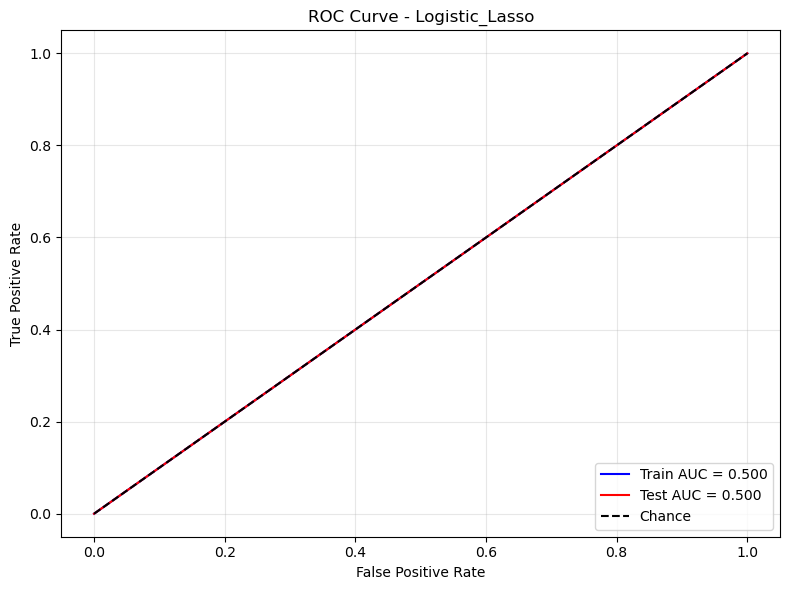

📊 Logistic_Lasso - Train AUC: 0.5000 | Test AUC: 0.5000

🔎 Performing randomized search for Logistic_Ridge...
✅ Best hyperparameters for Logistic_Ridge: {'penalty': 'l2', 'C': 100.0}


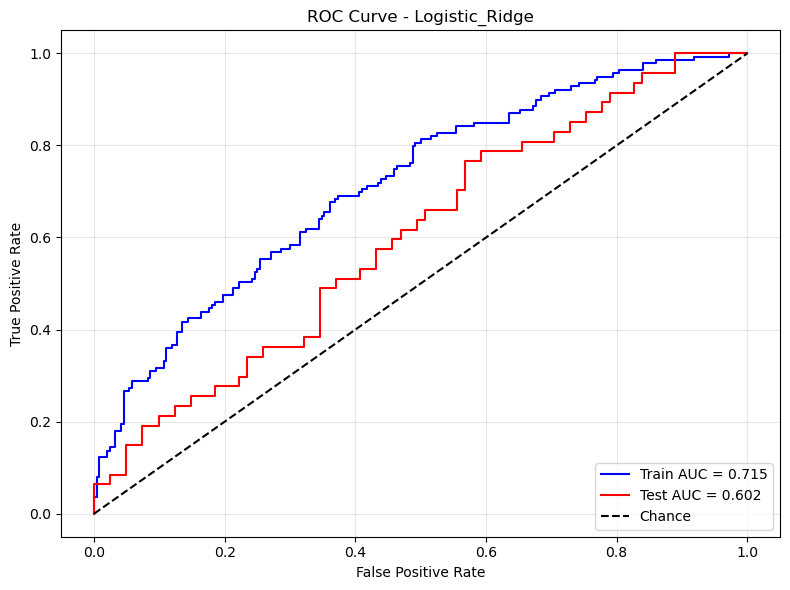

📊 Logistic_Ridge - Train AUC: 0.7150 | Test AUC: 0.6020

🔎 Performing randomized search for Logistic_ElasticNet...
✅ Best hyperparameters for Logistic_ElasticNet: {'penalty': 'elasticnet', 'l1_ratio': 0.1, 'C': 0.01}


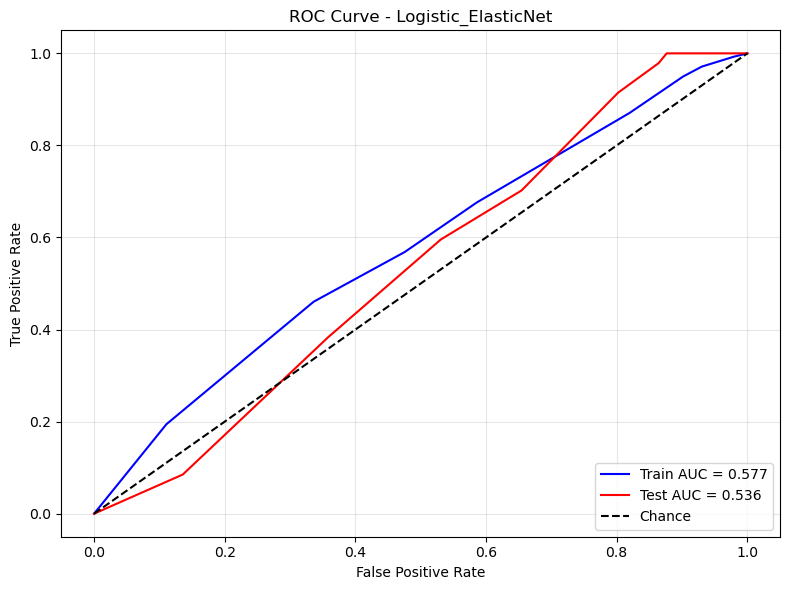

📊 Logistic_ElasticNet - Train AUC: 0.5766 | Test AUC: 0.5364

🔎 Performing randomized search for XGBoost...
✅ Best hyperparameters for XGBoost: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01}


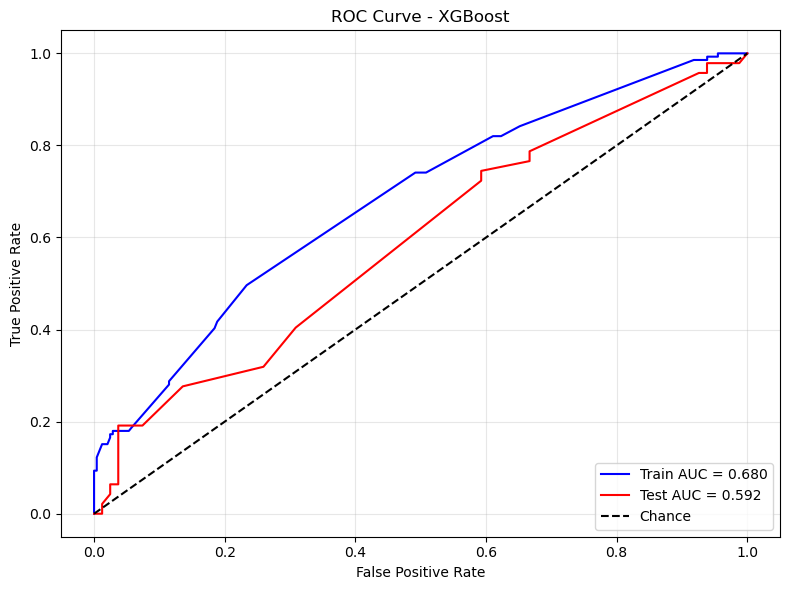

📊 XGBoost - Train AUC: 0.6798 | Test AUC: 0.5919

🔎 Performing randomized search for LightGBM...
[LightGBM] [Info] Number of positive: 139, number of negative: 244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001074 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362924 -> initscore=-0.562694
[LightGBM] [Info] Start training from score -0.562694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

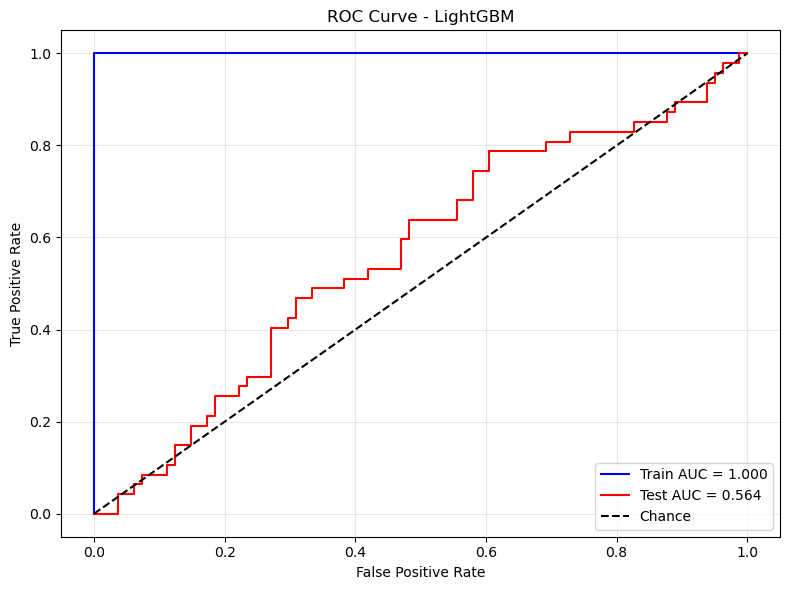

📊 LightGBM - Train AUC: 1.0000 | Test AUC: 0.5640

🔎 Performing randomized search for CatBoost...
✅ Best hyperparameters for CatBoost: {'learning_rate': 0.2, 'iterations': 300, 'depth': 4}


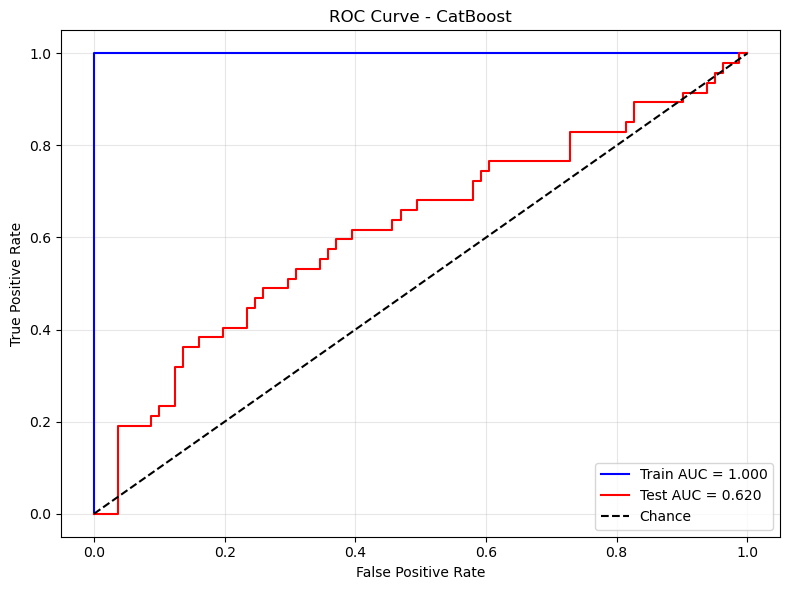

📊 CatBoost - Train AUC: 1.0000 | Test AUC: 0.6199

🔎 Performing randomized search for NeuralNetwork...
✅ Best hyperparameters for NeuralNetwork: {'hidden_layer_sizes': (100, 50), 'alpha': 0.0017782794100389228}


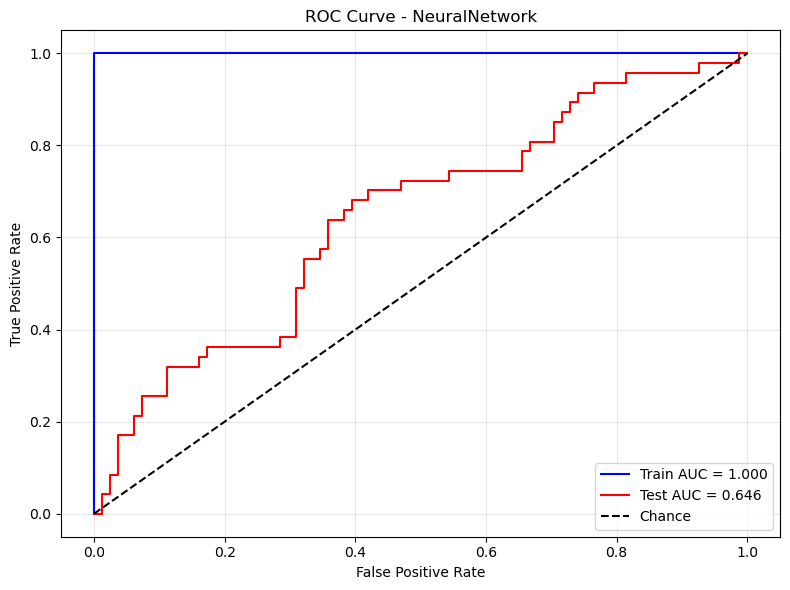

📊 NeuralNetwork - Train AUC: 1.0000 | Test AUC: 0.6459


In [205]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# === Train, evaluate, and plot ROC curves === #
for name, config in param_distributions.items():
    print(f"\n🔎 Performing randomized search for {name}...")

    # Randomized hyperparameter search
    random_search = RandomizedSearchCV(
        config["model"], config["params"], cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1
    )
    
    random_search.fit(X_train, y_train)  # Cross-validation on training set
    best_model = random_search.best_estimator_  # Select best model from CV
    
    print(f"✅ Best hyperparameters for {name}: {random_search.best_params_}")

    # Predict probabilities using the best model
    y_train_pred = best_model.predict_proba(X_train)[:, 1]
    y_test_pred = best_model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    # ROC curves
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, label=f"Train AUC = {auc_train:.3f}", color='blue')
    plt.plot(fpr_test, tpr_test, label=f"Test AUC = {auc_test:.3f}", color='red')
    plt.plot([0, 1], [0, 1], "k--", label="Chance")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {name}")
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.savefig(f"../output/plots/ROC_{name}_CHsumStat_PRADIdosage_additive.png")
    plt.show()

    print(f"📊 {name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")

# Fitting

In [206]:
print(y_train.value_counts())


ADRD
0    244
1    139
Name: count, dtype: int64


# Evaluation of feature importance

In [207]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


🔎 Evaluating Logistic_Lasso with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.5000 ± 0.0000
📊 Logistic_Lasso - Train AUC: 0.5000 | Test AUC: 0.5000


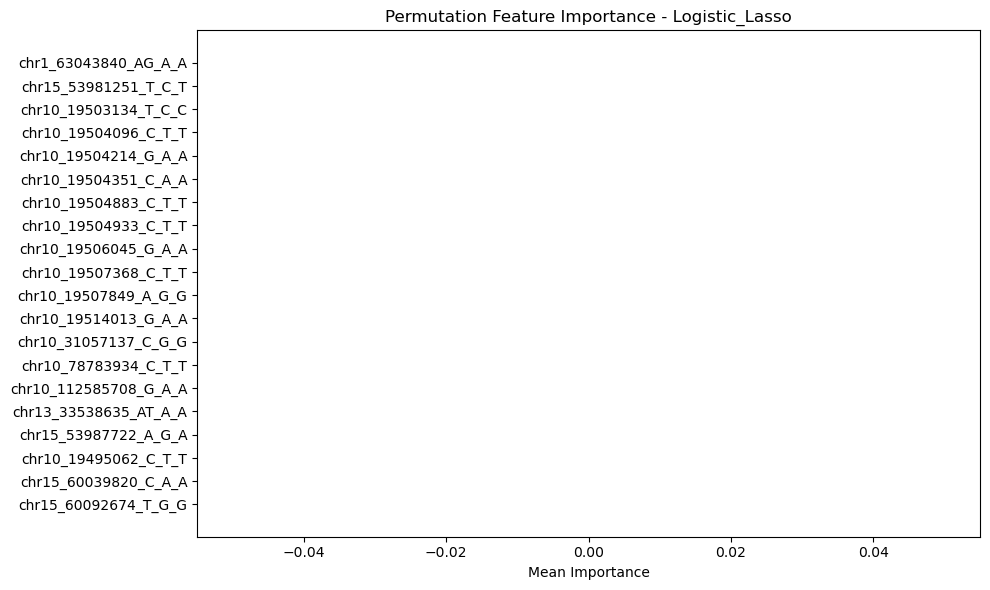


🔎 Evaluating Logistic_Ridge with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.4579 ± 0.0319
📊 Logistic_Ridge - Train AUC: 0.7150 | Test AUC: 0.6020


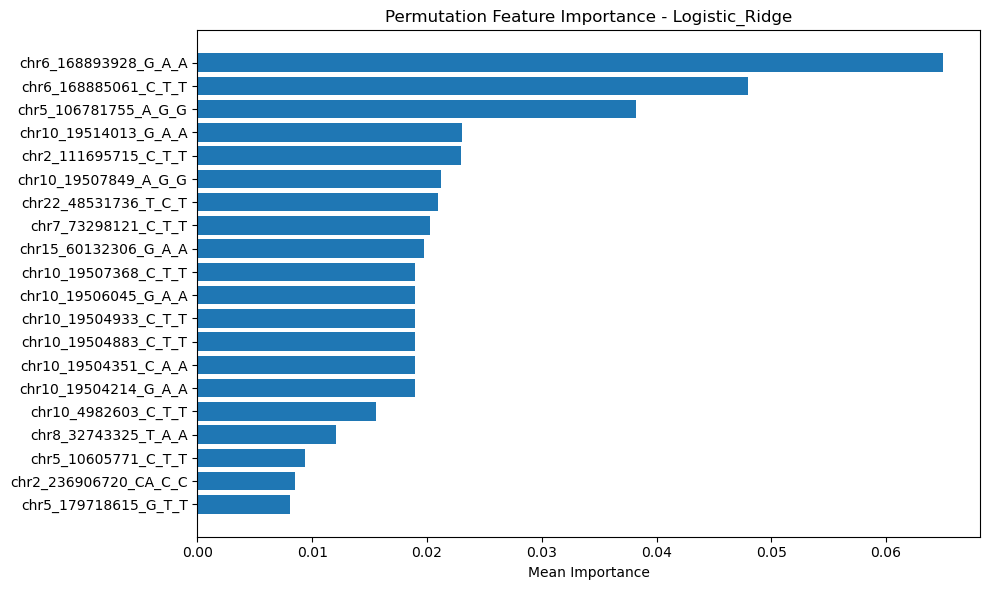


🔎 Evaluating Logistic_ElasticNet with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.5099 ± 0.0524
📊 Logistic_ElasticNet - Train AUC: 0.5766 | Test AUC: 0.5364


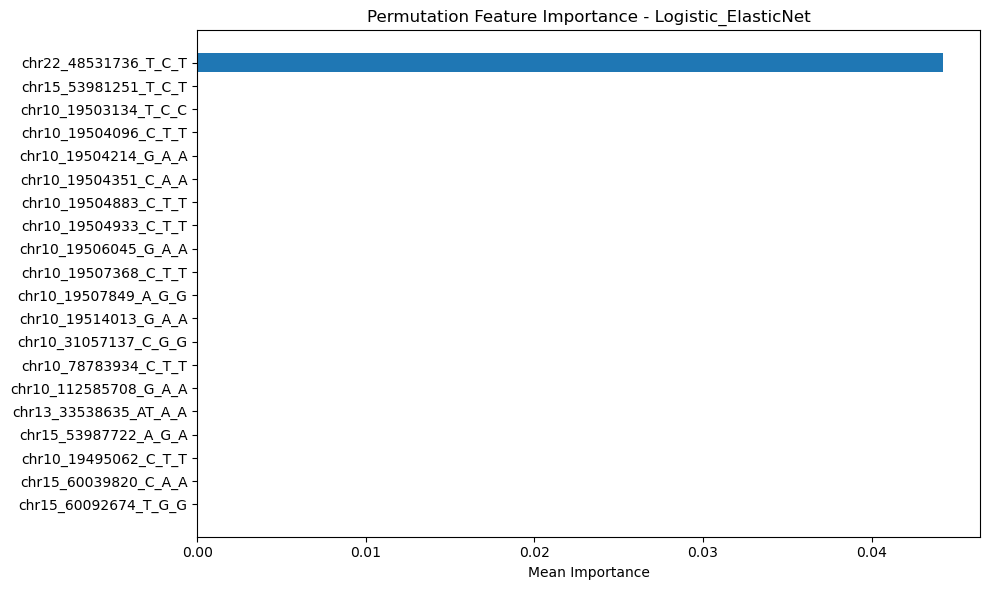


🔎 Evaluating XGBoost with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.4982 ± 0.0905
📊 XGBoost - Train AUC: 0.6798 | Test AUC: 0.5919


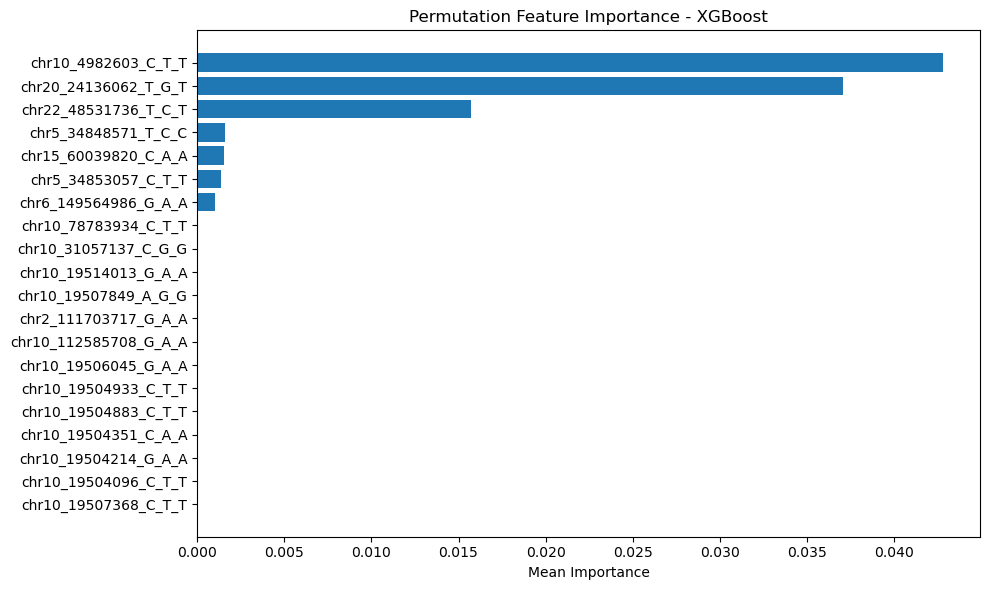


🔎 Evaluating LightGBM with best hyperparameters...
[LightGBM] [Info] Number of positive: 139, number of negative: 244
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000837 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 164
[LightGBM] [Info] Number of data points in the train set: 383, number of used features: 58
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.362924 -> initscore=-0.562694
[LightGBM] [Info] Start training from score -0.562694
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] N

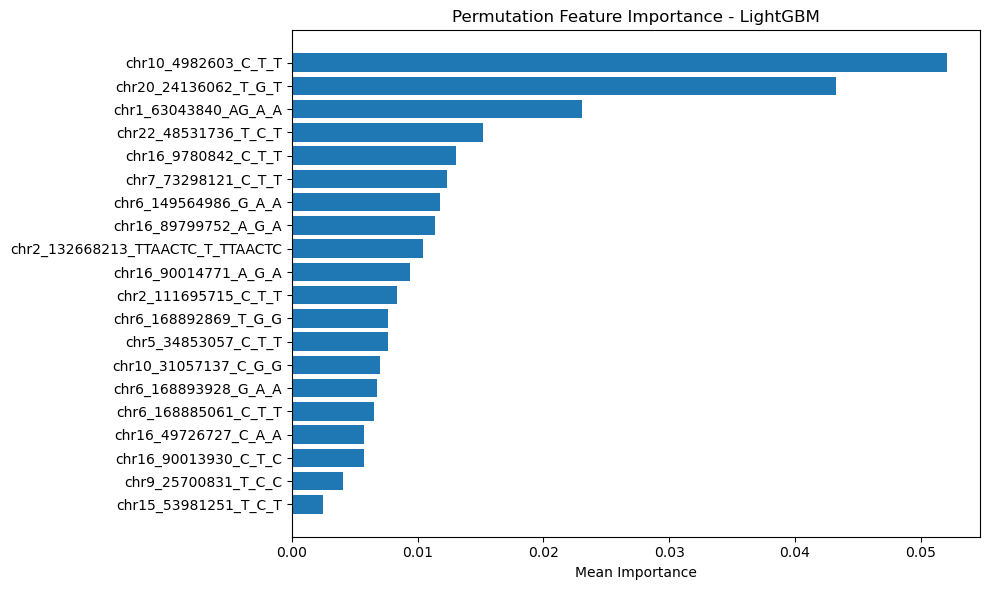


🔎 Evaluating CatBoost with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.4782 ± 0.1087
📊 CatBoost - Train AUC: 1.0000 | Test AUC: 0.6199


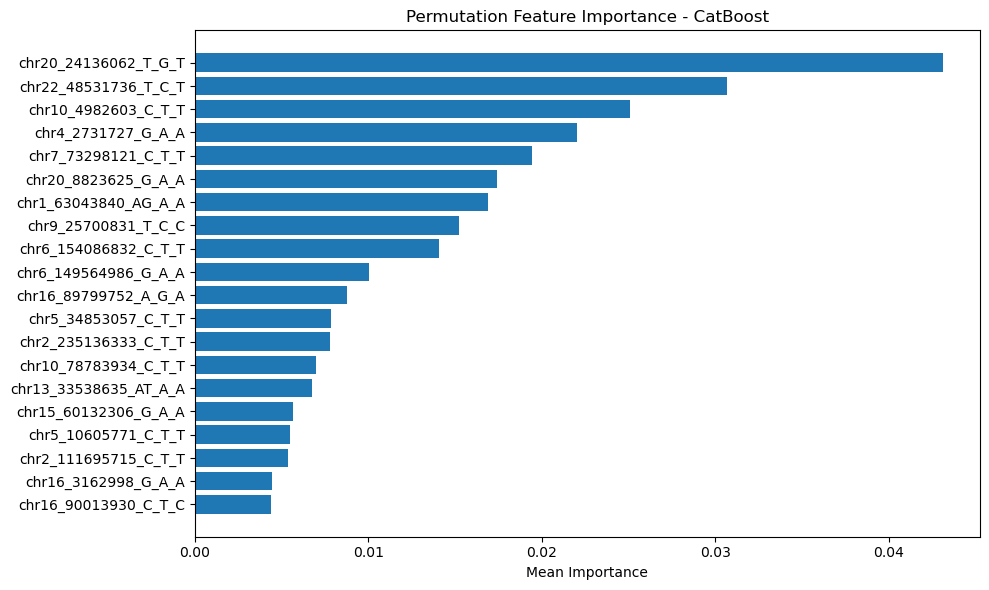


🔎 Evaluating NeuralNetwork with best hyperparameters...
✅ Mean ROC-AUC (CV): 0.4942 ± 0.0831
📊 NeuralNetwork - Train AUC: 1.0000 | Test AUC: 0.6015


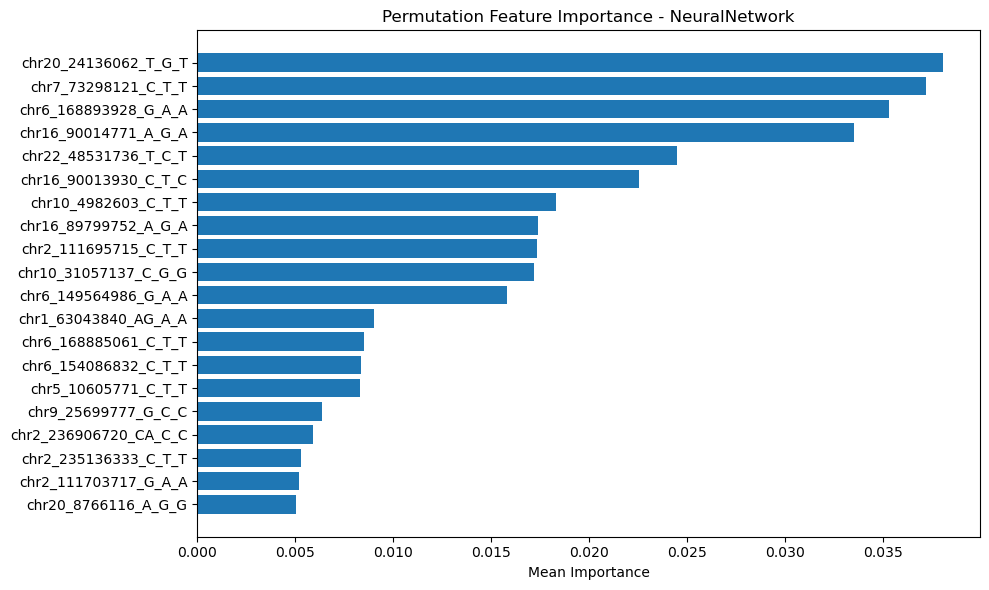

In [208]:
# === Cross-validation setup === #
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Store best models from the hyperparameter tuning step
best_models = {}

# === Evaluate models using the optimized parameters === #
for name, config in param_distributions.items():
    print(f"\n🔎 Evaluating {name} with best hyperparameters...")

    # Get the best model from RandomizedSearchCV
    random_search = RandomizedSearchCV(
        config["model"], config["params"], cv=cv, scoring='roc_auc', n_iter=10, random_state=42, n_jobs=-1
    )
    random_search.fit(X_train, y_train)  # Tune on training data only
    best_model = random_search.best_estimator_

    # Store the best model
    best_models[name] = best_model

    # Cross-validated ROC-AUC
    auc_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='roc_auc', n_jobs=-1)
    print(f"✅ Mean ROC-AUC (CV): {auc_scores.mean():.4f} ± {auc_scores.std():.4f}")

    # Predict probabilities using the best model
    y_train_pred = best_model.predict_proba(X_train)[:, 1]
    y_test_pred = best_model.predict_proba(X_test)[:, 1]

    # AUC scores
    auc_train = roc_auc_score(y_train, y_train_pred)
    auc_test = roc_auc_score(y_test, y_test_pred)

    print(f"📊 {name} - Train AUC: {auc_train:.4f} | Test AUC: {auc_test:.4f}")

    # === Permutation Feature Importance (PFI) === #
    result = permutation_importance(best_model, X_test, y_test, scoring='roc_auc', n_repeats=10, random_state=42, n_jobs=-1)

    # Save feature importance results
    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': result.importances_mean
    }).sort_values(by='Importance', ascending=False)
    importance_df.to_csv(f"../output/tables/PFI_{name}.csv", index=False)

    # === Plot top 20 important features === #
    plt.figure(figsize=(10, 6))
    plt.barh(importance_df['Feature'][:20][::-1], importance_df['Importance'][:20][::-1])
    plt.xlabel('Mean Importance')
    plt.title(f'Permutation Feature Importance - {name}')
    plt.tight_layout()
    plt.savefig(f"../output/plots/PFI_{name}_CHsumStat_PRADIdosage_additive.png")
    plt.show()
